In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score



In [2]:
# Load the dataset from Google Drive
autism_dataset = pd.read_csv("asd_data_csv.csv")


In [3]:
# number of rows and Columns in this dataset
autism_dataset.shape

(1961, 13)

In [4]:
autism_dataset.head()

,Social_Responsiveness_Scale,Age_Years,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developoental delay/intellectual disability,Social/Behavioural Issues,Anxiety_disorder,Sex,Jaundice,Family_member_with_ASD,Outcome
0,3,2,1,1,1,1,1,1,1,1,1,0,0
1,6,3,1,1,1,1,1,1,1,0,1,0,1
2,7,3,1,1,1,1,1,1,1,0,1,0,1
3,1,2,1,1,0,1,1,1,1,0,0,0,1
4,3,2,1,1,0,1,1,1,1,1,0,0,1


In [5]:

# Original data: Create a copy of the original dataset
original_data = autism_dataset.copy()

In [6]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(original_data.drop(columns='Outcome', axis=1))

In [7]:
normalized_df = pd.DataFrame(normalized_data, columns=original_data.columns[:-1])

In [8]:
# Merge original and normalized data
merged_data = pd.concat([original_data, normalized_df], axis=1)

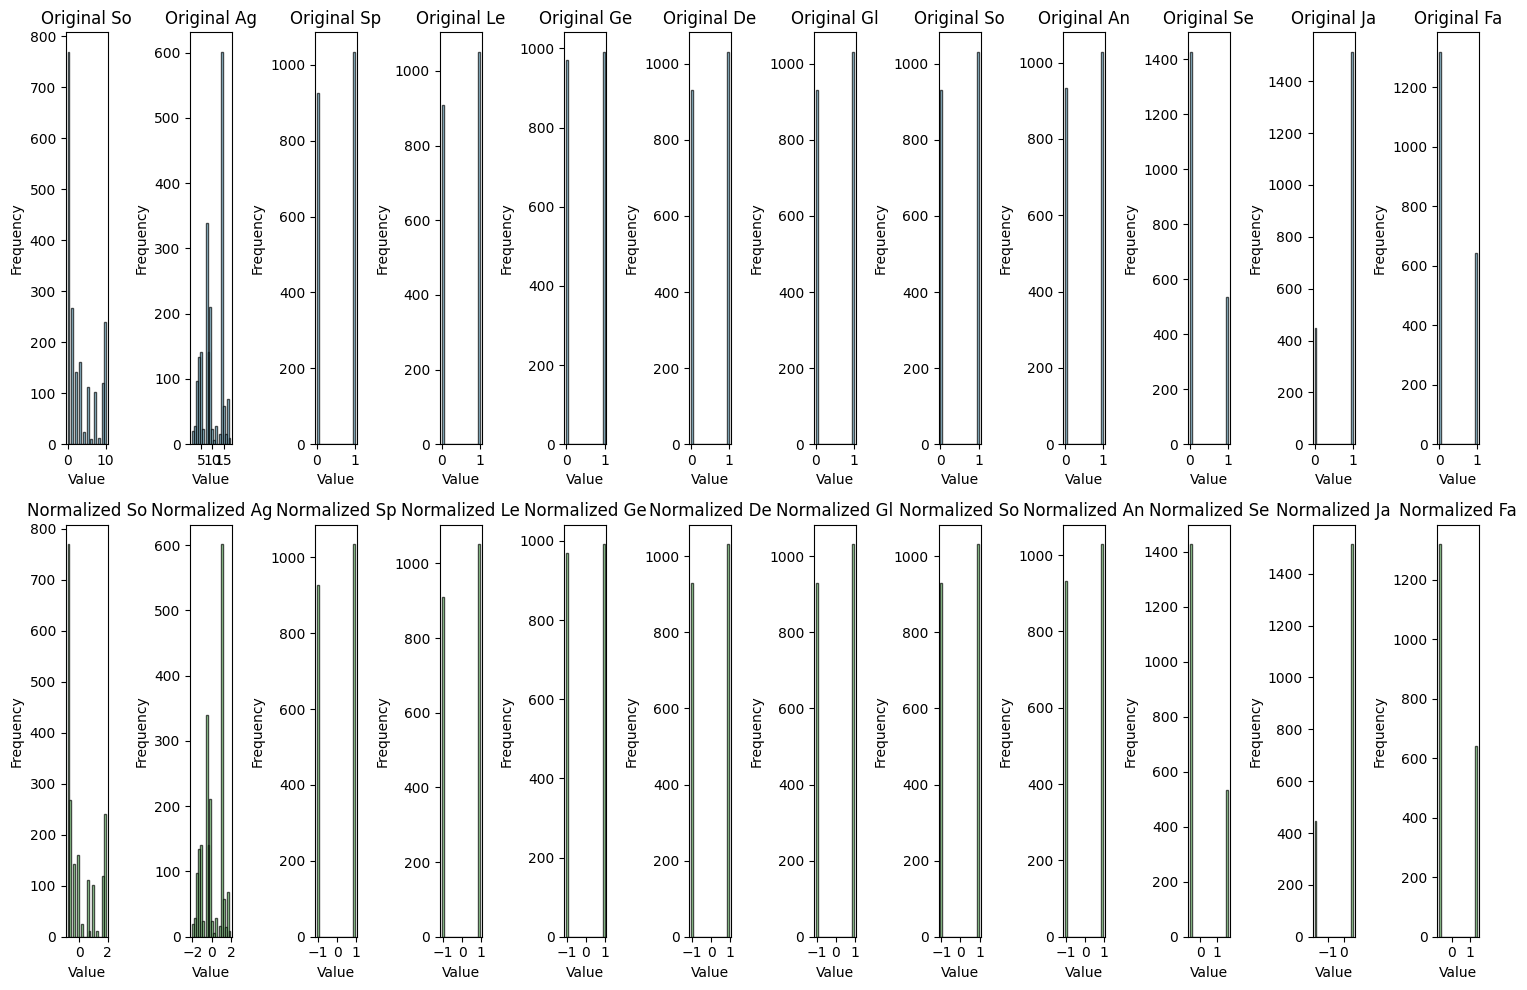

In [14]:

# Plot histograms for each feature before and after normalization
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Iterate over each feature
for i, column in enumerate(original_data.columns[:-1]):
    # Plot original data histogram
    plt.subplot(2, len(original_data.columns[:-1]), i + 1)
    plt.hist(original_data[column], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Original {column[:2]}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    # Plot normalized data histogram
    plt.subplot(2, len(original_data.columns[:-1]), i + 1 + len(original_data.columns[:-1]))
    plt.hist(normalized_df[column], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
    plt.title(f'Normalized {column[:2]}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

# Adjust layout and display plot
plt.tight_layout()
plt.show()

In [41]:

# Separating the data into features (X) and labels (Y)
X = merged_data.drop(columns='Outcome')
Y = merged_data['Outcome']

In [42]:


# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)



In [43]:
# Initialize SVM classifier
classifier = svm.SVC(kernel='linear')

In [44]:
# Train the classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [45]:

# Predictions on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.6919642857142857


In [51]:
# Predictions on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)


Accuracy score of the test data :  0.7302798982188295


In [47]:
# Accessing the merged data
print(merged_data)

      Social_Responsiveness_Scale  Age_Years  Speech Delay/Language Disorder  \
0                               3          2                               1   
1                               6          3                               1   
2                               7          3                               1   
3                               1          2                               1   
4                               3          2                               1   
...                           ...        ...                             ...   
1956                            1          7                               0   
1957                            0         14                               0   
1958                            1          7                               0   
1959                            0         14                               0   
1960                            1          7                               0   

      Learning disorder  Genetic_Disord

In [48]:
print(merged_data.describe())

       Social_Responsiveness_Scale    Age_Years  \
count                  1961.000000  1961.000000   
mean                      3.083631     9.618052   
std                       3.691156     4.301336   
min                       0.000000     1.000000   
25%                       0.000000     7.000000   
50%                       1.000000     9.000000   
75%                       5.000000    14.000000   
max                      10.000000    18.000000   

       Speech Delay/Language Disorder  Learning disorder  Genetic_Disorders  \
count                     1961.000000        1961.000000        1961.000000   
mean                         0.527282           0.535951           0.505354   
std                          0.499382           0.498833           0.500099   
min                          0.000000           0.000000           0.000000   
25%                          0.000000           0.000000           0.000000   
50%                          1.000000           1.000000          